### import necessary libraries 

In [363]:
import pandas as pd
import os, glob

### merge 12 months of sales data into single file

In [364]:
#merge 12 months of sales data into single file
path = r'./Sales_Data/'
all_files = glob.glob(path + 'Sales_*.csv')
df = pd.concat((pd.read_csv(f) for f in all_files))
df.to_csv('concat_df.csv', index=False)

### read in updated dataframe

In [365]:
all_data = pd.read_csv('concat_df.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

### what was the best month for sales? 

### remove empty values

In [366]:
all_data = all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

### convert to int

In [367]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

### create new column 'total sales'

In [368]:
all_data['Total sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

       Order Date                      Purchase Address  Total sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001        23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215        99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001       600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001        11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001        11.99

### clean order date column

In [369]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

       Order Date                      Purchase Address  Total sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001        23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215        99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001       600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001        11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001        11.99

### create month column and change to int32

In [370]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

       Order Date                      Purchase Address  Total sales  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001        23.90      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215        99.99      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001       600.00      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001        11.99      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001        11.99      4

### group sales by month

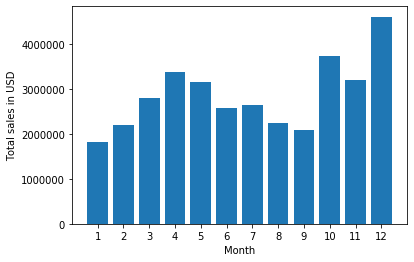

Best month for sales was December


In [371]:
import matplotlib.pyplot as plt
import numpy as np

results = all_data.groupby(['Month']).sum()
months = np.arange(1,13)
plt.bar(months, results['Total sales'])
plt.xticks(months)
_ = plt.xlabel('Month')
_ = plt.ylabel('Total sales in USD')
plt.show()
print('Best month for sales was December')

### How much was earned in December?

In [372]:
best_month = results['Total sales'].max()
print('The total sales for december was: ' + str(best_month))

The total sales for december was: 4613443.340001534


### What US city had the highest number of sales?

### create new column for state

In [373]:
def get_city(address):
    return address.split(',')[1]
def get_state(state_code):
    return state_code.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
2        176559  Bose SoundSport Headphones               1.0       99.99   
3        176560                Google Phone               1.0      600.00   
4        176560            Wired Headphones               1.0       11.99   
5        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)               3.0        2.99   
186846   259354                      iPhone               1.0      700.00   
186847   259355                      iPhone               1.0      700.00   
186848   259356      34in Ultrawide Monitor               1.0      379.99   
186849   259357        USB-C Charging Cable               1.0       11.95   

            Order Date                         Purchase Address  Total sales  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001        23.90   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215        99.99   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001       600.00   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001        11.99   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001        11.99   
...                ...                                      ...          ...   
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001         8.97   
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016       700.00   
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016       700.00   
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016       379.99   
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016        11.95   

        Month                 City  
0           4          Dallas (TX)  
2           4          Boston (MA)  
3           4     Los Angeles (CA)  
4           4     Los Angeles (CA)  
5           4     Los Angeles (CA)  
...       ...                  ...  
186845      9     Los Angeles (CA)  
186846      9   San Francisco (CA)  
186847      9   San Francisco (CA)  
186848      9   San Francisco (CA)  
186849      9   San Francisco (CA)  

[185950 rows x 9 columns]

In [374]:
results_state = all_data.groupby(['City']).sum()
results_state

Quantity Ordered    Price Each   Total sales   Month
City                                                                     
 Atlanta (GA)                 16602.0  2.779908e+06  2.795499e+06  104794
 Austin (TX)                  11153.0  1.809874e+06  1.819582e+06   69829
 Boston (MA)                  22528.0  3.637410e+06  3.661642e+06  141112
 Dallas (TX)                  16730.0  2.752628e+06  2.767975e+06  104620
 Los Angeles (CA)             33289.0  5.421435e+06  5.452571e+06  208325
 New York City (NY)           27932.0  4.635371e+06  4.664317e+06  175741
 Portland (ME)                 2750.0  4.471893e+05  4.497583e+05   17144
 Portland (OR)                11303.0  1.860558e+06  1.870732e+06   70621
 San Francisco (CA)           50239.0  8.211462e+06  8.262204e+06  315520
 Seattle (WA)                 16553.0  2.733296e+06  2.747755e+06  104941

<function matplotlib.pyplot.show(*args, **kw)>

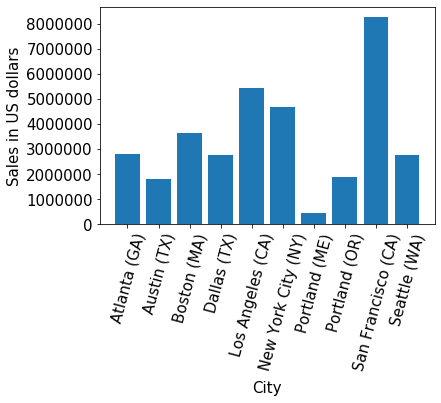

In [375]:
city = [city for city, df in all_data.groupby(['City'])]

plt.bar(city, results_state['Total sales'])
plt.xticks(city, rotation=75, size=15)
plt.yticks(size=15)
_ = plt.xlabel('City', size=15)
_ = plt.ylabel('Sales in US dollars', size=15)
plt.show

### How high was sales in the highest earning city?

In [376]:
results_state = all_data.groupby(['City']).sum()
best_city = results_state['Total sales'].max()
print('The best earning city is San Fransisco with: ' + str(best_city) + ' in sales.')

The best earning city is San Fransisco with: 8262203.910004012 in sales.


### what time should we display advertisements to maximize likelihood of customer's buying product?

In [377]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address  Total sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001        23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215        99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001       600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001        11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001        11.99   

   Month               City  
0      4        Dallas (TX)  
2      4        Boston (MA)  
3      4   Los Angeles (CA)  
4      4   Los Angeles (CA)  
5      4   Los Angeles (CA)

In [378]:
import datetime as dt

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address  Total sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001        23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215        99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001       600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001        11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001        11.99   

   Month               City  Hour  Minute  
0      4        Dallas (TX)     8      46  
2      4        Boston (MA)    22      30  
3      4   Los Angeles (CA)    14      38  
4      4   Los Angeles (CA)    14      38  
5      4   Los Angeles (CA)     9      27

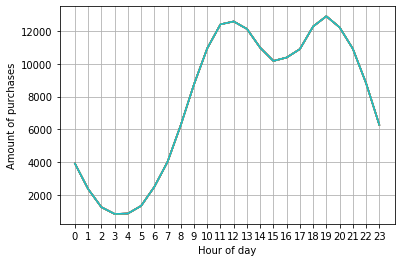

In [348]:
hour = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hour, all_data.groupby('Hour').count())
plt.xticks(hour)
_ = plt.xlabel('Hour of day')
_ = plt.ylabel('Amount of purchases')
plt.grid()
plt.show()

### what products are most often sold together?

In [379]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\Dennis Besseling\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Order ID                                            Grouped
3     176560                     Google Phone, Wired Headphones
18    176574                 Google Phone, USB-C Charging Cable
30    176585  Bose SoundSport Headphones, Bose SoundSport He...
32    176586               AAA Batteries (4-pack), Google Phone
119   176672     Lightning Charging Cable, USB-C Charging Cable

### count duplicates 

In [389]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

print('The products that sold the most together was iPhone + Lightning Charging Cable')

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
The products that sold the most together was iPhone + Lightning Charging Cable


### what product sold the most? why did it sold the most?

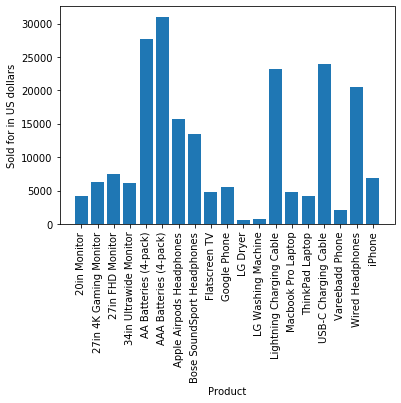

In [426]:
all_products = all_data.groupby('Product')
quantity_ordered = all_products.sum()['Quantity Ordered']
product = [product for product, df in all_products]

plt.bar(product, quantity_ordered)
plt.xticks(product, rotation='vertical')
_ = plt.xlabel('Product')
_ = plt.ylabel('Sold for in US dollars')
plt.show()

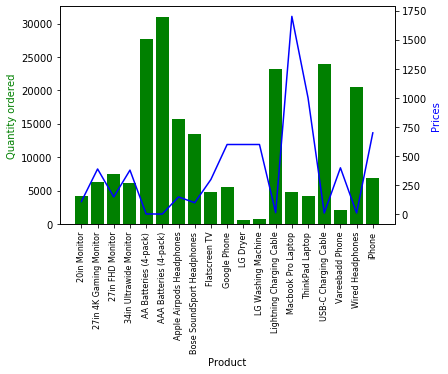

In [427]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='g')
ax2.plot(product, prices, 'b-')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)
plt.show()

### create dictionary with key_value pair (product and price)

In [436]:
product_list = all_data['Product']
price_list = all_data['Price Each']
dictionary = dict(zip(product_list, price_list))

dictionary

{'USB-C Charging Cable': 11.95,
 'Bose SoundSport Headphones': 99.99,
 'Google Phone': 600.0,
 'Wired Headphones': 11.99,
 'Macbook Pro Laptop': 1700.0,
 'Lightning Charging Cable': 14.95,
 '27in 4K Gaming Monitor': 389.99,
 'AA Batteries (4-pack)': 3.84,
 'Apple Airpods Headphones': 150.0,
 'AAA Batteries (4-pack)': 2.99,
 'iPhone': 700.0,
 'Flatscreen TV': 300.0,
 '27in FHD Monitor': 149.99,
 '20in Monitor': 109.99,
 'LG Dryer': 600.0,
 'ThinkPad Laptop': 999.99,
 'Vareebadd Phone': 400.0,
 'LG Washing Machine': 600.0,
 '34in Ultrawide Monitor': 379.99}